# About

Plot the graphs from the arrays given by the exported .mat file generated using the matlab script 'ADM_simData.m' (located in the 'data' folder).

# Libraries

In [1]:
%matplotlib inline
# Toggle on/off
# %matplotlib notebook

import os
import numpy as np
import pandas as pd
import scipy.io as sio
import seaborn as sns
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import matplotlib.transforms as tsfm
import matplotlib.colors as clr
import math
from math import pi

from lib import *

from IPython.display import clear_output

# Import data

In [2]:
# Directory + import .mat file as dictionary:
dir_main = os.getcwd()
dataFolder = 'ICBM'
dataName = 'results1.mat'
dirImport = os.path.join(dir_main, 'data', 'arrays', dataFolder, dataName)
dictMat = sio.loadmat(dirImport)

# Label parameter and arrays
N = dictMat['N'][0,0]
r0 = np.reshape(dictMat['r0'], -1)
v0 = dictMat['v0'][0,0]
kappa = dictMat['kappa'][0,0]
gamma = dictMat['gamma']

W = dictMat['W']
pos = dictMat['pos']

t0 = dictMat['t0'][0,0]
tf = dictMat['tf'][0,0]
eta = dictMat['eta'][0,0]

tau0 = dictMat['tau0']
tau = dictMat['tau']
dist = dictMat['dist']

eta = dictMat['eta'][0,0]
eigs_iter = dictMat['eigs_iter']
rE_iter = dictMat['rE_iter']

sol_t = np.reshape(dictMat['t'], -1)
sol_y = dictMat['y']

## Parameters

In [3]:
var_name = ['N', r'Initial velocity $v_0$', 
            r'Scaling factor $\kappa$', 
            r'Myelination rate $\eta$', 
            r'Baseline firing rate $r_i^0$']

var_value = [N, v0, kappa, eta, r0[0]]

var_name = np.array(var_name)
var_value = np.array(var_value)

pos_df=pd.DataFrame({'Variable' : var_name, 'Value': var_value})
pos_df

,Variable,Value
0,N,68.0000
1,Initial velocity $v_0$,3.0000
2,Scaling factor $\kappa$,0.0005
3,Myelination rate $\eta$,200000.0000
4,Baseline firing rate $r_i^0$,1.0000


# Figures

## Eigenvalues

Complex plot of eigenvalues over iterations.

### Set up arrays

In [4]:
isLabels = True # False if no labels on the plots
num_iter = eigs_iter.shape[1]

# Set up eigenvalue arrays at iterations start, halfway, and end:
eigs0_re, eigs0_im = eigs_iter[:,0].real, eigs_iter[:,0].imag
eigs1_re, eigs1_im = eigs_iter[:,int(num_iter/2)].real, eigs_iter[:,int(num_iter/2)].imag
eigs2_re, eigs2_im = eigs_iter[:,-1].real, eigs_iter[:,-1].imag

### Plot

In [5]:
# Plot positions [left, bottom, width, height] 
bbox0 = [0.05, 0.05, 0.25, 0.9] # Fig A
bbox1 = [0.40, 0.05, 0.25, 0.9] # Fig B
bbox2 = [0.75, 0.05, 0.25, 0.9] # Fig C

# Line and marker options
alpAx = 0.6
lwAx = 1.0
ms1 = 30

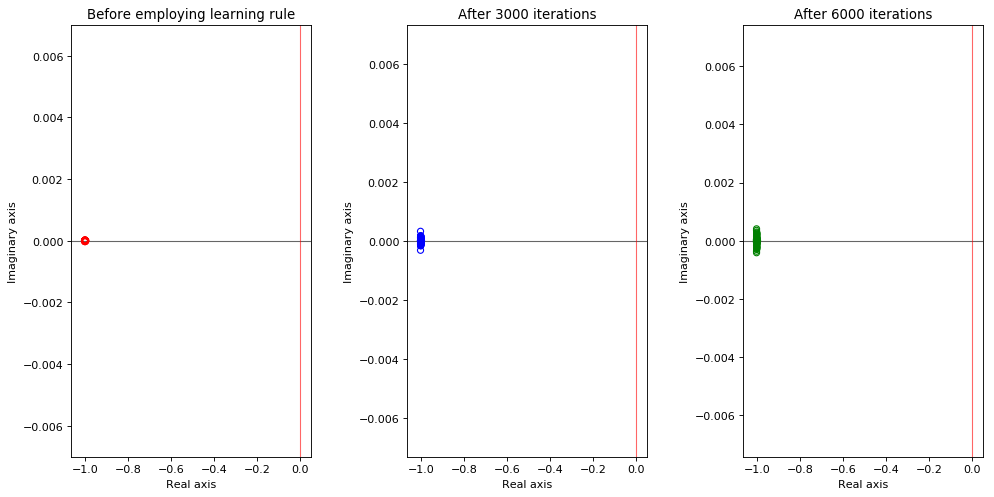

In [6]:
fig, ax = plt.subplots(3, figsize=(12,6), dpi=80)

# Set positions
ax[0].set_position(bbox0)
ax[1].set_position(bbox1)
ax[2].set_position(bbox2)

ax[0].scatter(eigs0_re, eigs0_im, facecolors='none', edgecolors='red', s=ms1, zorder=1)
ax[1].scatter(eigs1_re, eigs1_im, facecolors='none', edgecolors='blue', s=ms1, zorder=1)
ax[2].scatter(eigs2_re, eigs2_im, facecolors='none', edgecolors='green', s=ms1, zorder=1)

# Axis lines
for k in range(len(ax)):
    ax[k].axhline(y=0, lw=lwAx, alpha=alpAx, color='black', zorder=0)
    ax[k].axvline(x=0, lw=lwAx, alpha=alpAx, color='red', zorder=0)
    # ax[k].set_xlim(left=-6, right=6)
    
if isLabels:
    ax[0].set_title('Before employing learning rule')
    ax[1].set_title('After {} iterations'.format(int(num_iter/2)))
    ax[2].set_title('After {} iterations'.format(num_iter))
    
    for k in range(len(ax)):
        ax[k].set_xlabel('Real axis')
        ax[k].set_ylabel('Imaginary axis')

## Numerical plot over time

Plot the numerical arrays of the firing rates $r_i(t)$ over time, generated using the function 'ode45' from MATLAB.

### Set up arrays

In [7]:
isLabels = True # False if no labels on the plots
rE = rE_iter[:,-1]
rE_x = sol_t[-1] * 4/5 * np.ones(rE.shape)

iters = np.arange(1,num_iter+1)
objective = np.zeros(num_iter)
for i in range(num_iter):
    objective[i] = FunLib.objectiveFun(rE_iter[:,i])

### Convergence over time

In [8]:
# Line and marker options
alpAx = 0.6
lwAx = 1.0
ms1 = 30

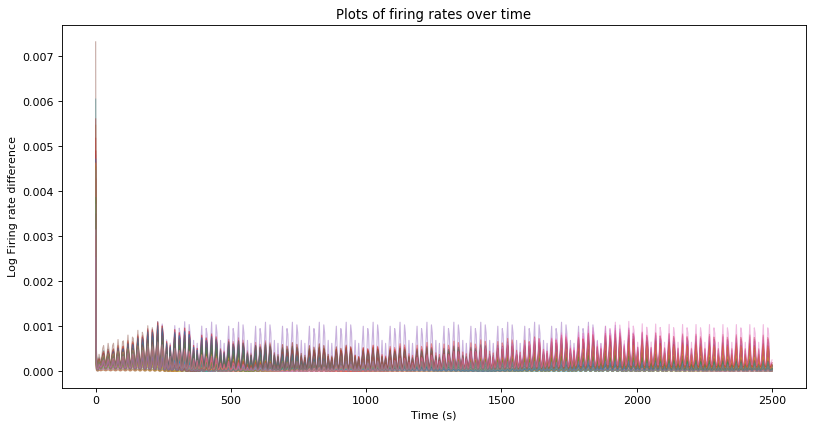

In [9]:
fig, ax = plt.subplots(1, figsize=(12,6), dpi=80)

ax.plot(sol_t, np.log(1 + np.abs(sol_y.T - rE)), lw=1.0, alpha=0.5, zorder=1)
# ax.scatter(rE_x, rE, marker='x', zorder=2) # Mark the equilibrium points with 'x's

if isLabels:
    ax.set_title('Plots of firing rates over time')
    ax.set_xlabel('Time (s)')
    ax.set_ylabel('Log Firing rate difference')

### Objective function over time

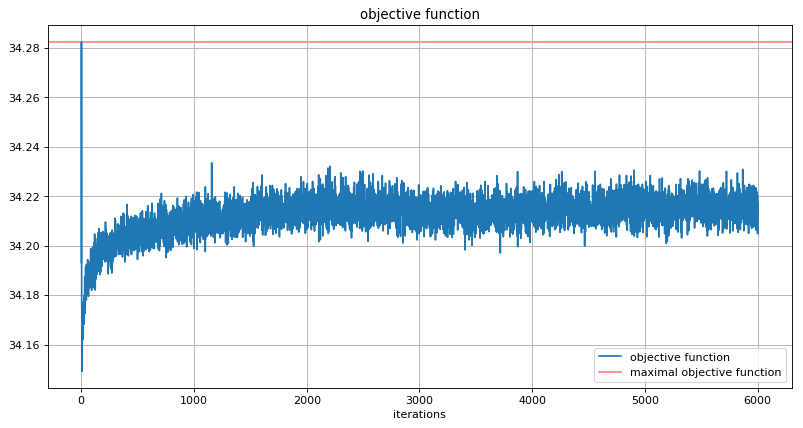

In [10]:
fig, ax = plt.subplots(1, figsize=(12,6), dpi=80)

ax.plot(iters, objective, lw=1.5, alpha=1.0, label='objective function', zorder=2)
ax.axhline(np.max(objective), color='red', alpha=0.5, label='maximal objective function', zorder=0)
ax.set_title('objective function')
ax.set_xlabel('iterations')
ax.legend()
ax.grid(True, zorder=0)


### Connectivity and axonal lengths

Text(0.5,1,'Axonal lengths (mm)')

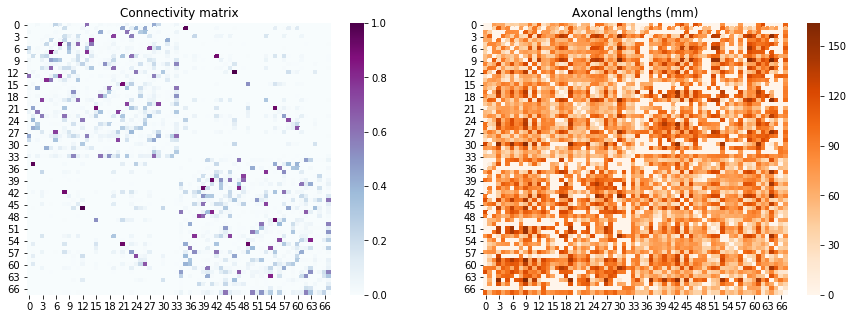

In [11]:
# Display connectivity and axonal length matrices
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))
sns.heatmap(ax = ax1, data = W, cmap="BuPu")
sns.heatmap(ax = ax2, data = dist * (W > 0), cmap="Oranges")
ax1.set_title('Connectivity matrix')
ax2.set_title('Axonal lengths (mm)')

### Delay matrices

Text(0.5,1,'Where they differ? (boolean values, 0=differ)')

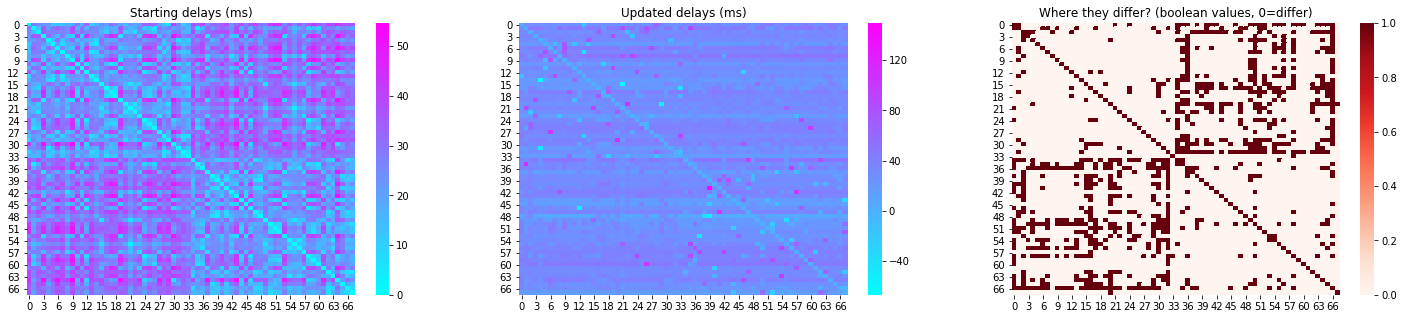

In [12]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(25,5))
sns.heatmap(ax = ax1, data = tau0, cmap="cool")
sns.heatmap(ax = ax2, data = tau, cmap="cool")
sns.heatmap(ax = ax3, data = np.array(tau0 == tau), cmap="Reds")
ax1.set_title('Starting delays (ms)')
ax2.set_title('Updated delays (ms)')
ax3.set_title('Where they differ? (boolean values, 0=differ)')

In [13]:
A = (W > 0).astype('float64')
(dist * A)[:,0]
gamma

array([[1.70238323e-04, 3.15219509e-01, 3.46620156e-01, ...,
        8.74768297e-02, 1.41995317e-01, 3.46494455e-01],
       [3.34820918e-03, 2.79824124e-14, 2.54272133e-01, ...,
        2.46407993e-01, 1.00638888e-04, 2.54459868e-01],
       [3.25416257e-01, 3.21019234e-01, 6.23409480e-06, ...,
        2.82986002e-01, 3.19292067e-01, 3.19783811e-01],
       ...,
       [1.10063134e-01, 5.06734935e-01, 2.25861561e-01, ...,
        3.48358226e-05, 5.06739342e-01, 2.70927315e-01],
       [2.49845318e-01, 6.60111326e-01, 3.92988687e-01, ...,
        5.83022332e-01, 5.50731487e-03, 4.93970425e-04],
       [2.02251342e-01, 2.02253678e-01, 2.02169021e-01, ...,
        1.83387691e-01, 2.01937348e-01, 1.70634767e-03]])